# n Vs. k Analysis for Swiss Roll

In this notebook we analyse results of the n Vs. k analysis for Swiss Roll

In [3]:
import os
import sys
import json
import glob
import pickle

import torch
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
dump_dir = "/azuredrive/deepimage/data1/t-achetan/adv_geom_dumps/dumps/expC_dist_learner_for_adv_ex/rf_expts/rdm_swrolls/"






## 1. For Distance Learner - n Vs. k analysis




In [24]:
cmetrics_dict = {}
name_template = os.path.join(dump_dir, "*", "1")
for name in glob.glob(name_template):
#     print(name)
    with open(os.path.join(name, "metrics.json")) as f:
        metrics = json.load(f)
        
    with open(os.path.join(name, "config.json")) as f:
        config = json.load(f)
        
    model_dict = torch.load(os.path.join(name, "models", "ckpt.pth"))

    n = config["data"]["data_params"]["test"]["n"]
    k = config["data"]["data_params"]["test"]["k"]
    
    if k not in cmetrics_dict:
        cmetrics_dict[k] = dict()
    if n not in cmetrics_dict[k]:
        cmetrics_dict[k][n] = dict()
    
    for key in metrics:
        cmetrics_dict[k][n][key] = metrics[key]["values"][0]
    cmetrics_dict[k][n]["val_loss"] = model_dict["val_loss"]
    cmetrics_dict[k][n]["loss"] = model_dict["loss"]
    

In [46]:
cmetrics_dict[2][2].keys()

dict_keys(['test.S1.f1-score', 'test.S1.onmfld.f1-score', 'test.S1.onmfld.precision', 'test.S1.onmfld.recall', 'test.S1.onmfld.support', 'test.S1.precision', 'test.S1.recall', 'test.S1.support', 'test.S2.f1-score', 'test.S2.onmfld.f1-score', 'test.S2.onmfld.precision', 'test.S2.onmfld.recall', 'test.S2.onmfld.support', 'test.S2.precision', 'test.S2.recall', 'test.S2.support', 'test.macro avg.f1-score', 'test.macro avg.onmfld.f1-score', 'test.macro avg.onmfld.precision', 'test.macro avg.onmfld.recall', 'test.macro avg.onmfld.support', 'test.macro avg.precision', 'test.macro avg.recall', 'test.macro avg.support', 'test.off-mfld.f1-score', 'test.off-mfld.onmfld.f1-score', 'test.off-mfld.onmfld.precision', 'test.off-mfld.onmfld.recall', 'test.off-mfld.onmfld.support', 'test.off-mfld.precision', 'test.off-mfld.recall', 'test.off-mfld.support', 'test.weighted avg.f1-score', 'test.weighted avg.onmfld.f1-score', 'test.weighted avg.onmfld.precision', 'test.weighted avg.onmfld.recall', 'test.wei

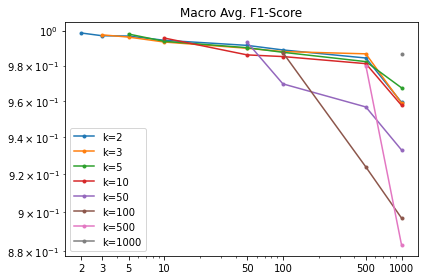

In [50]:
metric = "test.macro avg.f1-score"
dims = [2, 3, 5, 10, 50, 100, 500, 1000]

for kidx in range(len(dims)):
    k = dims[kidx]
    metric_list = list()
    x_ticks = list()
    for nidx in range(kidx, len(dims)):
        n = dims[nidx]
        metric_list.append(cmetrics_dict[k][n][metric])
        x_ticks.append(n)
        
    plt.loglog(x_ticks, metric_list, marker=".", label="k={}".format(k))
plt.xticks(dims, dims)
plt.legend()
plt.title("Macro Avg. F1-Score")
plt.tight_layout()
plt.show()

[1000]

In [18]:
metrics

{'test.S1.f1-score': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.365808'],
  'values': [0.9992665199706608]},
 'test.S1.onmfld.f1-score': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.323026'],
  'values': [0.9994664532479659]},
 'test.S1.onmfld.precision': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.322992'],
  'values': [1.0]},
 'test.S1.onmfld.recall': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.323020'],
  'values': [0.9989334755365952]},
 'test.S1.onmfld.support': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.323030'],
  'values': [7501]},
 'test.S1.precision': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.365789'],
  'values': [0.9995997865528282]},
 'test.S1.recall': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.365803'],
  'values': [0.9989334755365952]},
 'test.S1.support': {'steps': [0],
  'timestamps': ['2021-10-05T11:53:07.365812'],
  'values': [7501]},
 'test.S2.f1-score': {'steps': [0],
  'timestamps': ['2021-10-05T11